Using integrals as a metric of contextual effects seem straightforward. Previous analysis has shown that both integral
and significant integral are closely correlated, so there is a value on using the later since its more robust to noise.
This approach has the shortcoming of not giving information about the temporal evolution of the contextual effects.
These are potential goals of this notebook:
1. Center of mass calculation
    1. for all bins? for significant bins!
2. Examples of cells from parameter space
3. train classifier + cross validation (optional, should go in another notebook?)
4. total integral/center-of-mass threshold (clean up memory less units)
    1.compare dPCA between full population vs filtered (context units)
5. classify probes by wave source (eg. ferret vocalizations)
6. baseline evoked activity threshold
    1. specific for context probe related activity (already in place?)
    2. in a probe specific manner
7. clean up probe quality
    1. treat different unit-probe combination as individual cells (collapse/mean across bigger population)
    2. filter out non responsive unit-probe combinations
8. Check spectrogram for responding units
    1. check and compare vs silence (silence as probe?)

In [43]:
import pathlib as pl
from configparser import ConfigParser

import numpy as np
import scipy.stats as sst
import matplotlib.pyplot as plt

from cpp_cache import set_name
import joblib as jl

0.8255413950371603


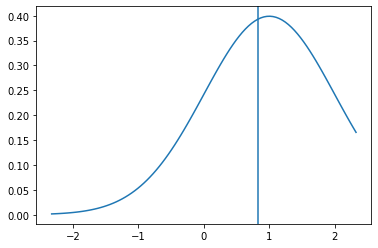

In [44]:
#toy example on how to calculate the center of mass.

def center_of_mass(values, times):
    return np.sum(values * times) / np.sum(values)

# generate some arbitrary data
x = np.linspace(sst.norm.ppf(0.01),
                sst.norm.ppf(0.99), 100)
y = sst.norm.pdf(x, 1, 1)

# calculates the center of mas
mass = center_of_mass(y, x)
print(mass)

# plots example
fig, ax = plt.subplots()
ax.plot(x, y)
ax.axvline(mass)
plt.show(fig)

In [45]:
# loads the summary metrics

config = ConfigParser()
if pl.Path('../context_probe_analysis/config/settings.ini').exists():
    config.read(pl.Path('../context_probe_analysis/config/settings.ini'))
elif pl.Path('../../../context_probe_analysis/config/settings.ini').exists():
    config.read(pl.Path('../../../context_probe_analysis/config/settings.ini'))
else:
    raise FileNotFoundError('config file could not be find')

meta = {'reliability': 0.1,  # r value
        'smoothing_window': 0,  # ms
        'raster_fs': 30,
        'transitions': ['silence', 'continuous', 'similar', 'sharp'],
        'montecarlo': 1000,
        'zscore': True,
        'dprime_absolute': None}

summary_DF_file = pl.Path(config['paths']['analysis_cache']) / 'DF_summary' / set_name(meta)

DF = jl.load(summary_DF_file)

In [ ]:
# plots center of mass againste tau
